Includes EDA of incidents over time

In [1]:
import pandas as pd
import sys
sys.path.append('..')


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# plt.xkcd()

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from scripts import util
conn = util.connect_rds()

In [5]:
df = pd.read_sql('select * from rws_schema.ongevallen;', con=conn)

In [6]:
df.loc[:,'accident'] = 1

In [7]:
df.loc[:,'hour'] = df.datetime.map(lambda x: x.hour)

In [8]:
df.loc[:,'weekday'] = df.datetime.map(lambda x: x.weekday())
df.loc[:,'month'] = df.datetime.map(lambda x: x.month)
df.loc[:,'year'] = df.datetime.map(lambda x: x.year)
df.loc[:,'week'] = df.datetime.map(lambda x: x.week)
df.loc[:,'date'] = df.datetime.map(lambda x: x.date())


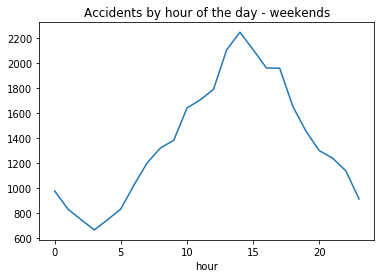

In [61]:
plt.title('Accidents by hour of the day - weekends')
df.loc[df.weekday>4].groupby('hour')['accident'].sum().plot(kind='line')

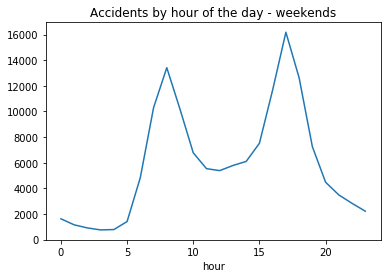

In [62]:
plt.title('Accidents by hour of the day - weekends')
df.loc[df.weekday<5].groupby('hour')['accident'].sum().plot(kind='line')

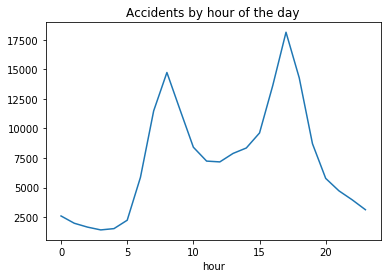

In [11]:
plt.title('Accidents by hour of the day')
df.groupby('hour')['accident'].sum().plot(kind='line')

([<matplotlib.axis.XTick at 0x7fd5b536de80>,
 <a list of 7 Text xticklabel objects>)

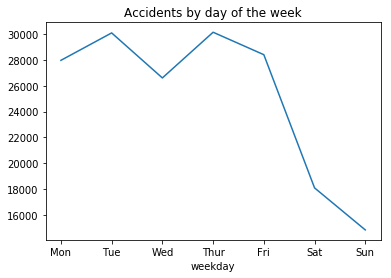

In [13]:
df.groupby('weekday')['accident'].sum().plot(kind='line')
plt.title('Accidents by day of the week')
plt.xticks([0,1,2,3,4,5,6], ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])

In [14]:
df.loc[:,'month'] = df.datetime.map(lambda x: x.month)

In [23]:
pd.np.linspace(1,52, 52)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.])

Text(0.5,1,'Week on Week accidents (Overall)')

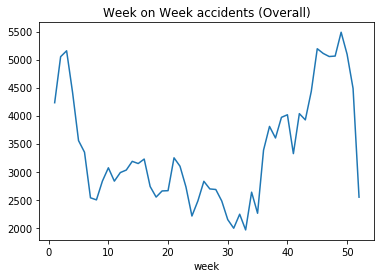

In [25]:
df.groupby('week')['accident'].sum()[pd.np.linspace(1,52, 52)].plot(kind='line')
plt.title('Week on Week accidents (Overall)')

Text(0.5,1,'YoY accidents - ongevallen')

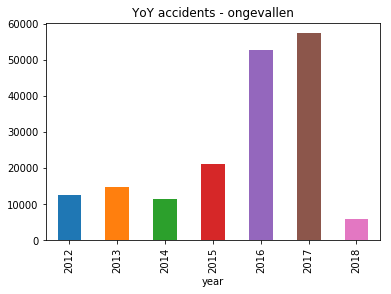

In [17]:
df.groupby('year')['accident'].sum().plot(kind='bar')
plt.title('YoY accidents - ongevallen')

In [52]:
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


In [27]:
df2012 = df.loc[df.year==2012]
df2013 = df.loc[df.year==2013]
df2014 = df.loc[df.year==2014]
df2015 = df.loc[df.year==2015]
df2016 = df.loc[df.year==2016]
df2017 = df.loc[df.year==2017]

In [101]:
df2016.week.unique()

array([52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36,
       35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 23, 24, 22, 21, 20, 19,
       18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,
        1, 53])

In [95]:
# df2016['date'].value_counts()

In [240]:
#todo check the timestamp
#todo check the key
pd.to_datetime('2017-01-07')

Timestamp('2017-01-07 00:00:00')

In [245]:
df.date[0]

datetime.date(2018, 2, 19)

In [243]:
pd.to_datetime('2017-01-07').date()

datetime.date(2017, 1, 7)

In [113]:
df2017.groupby('date')['accident'].sum().describe()

count     339.000000
mean      169.283186
std        93.751068
min         1.000000
25%       114.500000
50%       155.000000
75%       201.000000
max      1164.000000
Name: accident, dtype: float64

In [181]:
df2016.groupby('date')['accident'].sum().describe()

count    366.000000
mean     144.051913
std       83.553346
min       23.000000
25%       81.000000
50%      128.500000
75%      189.750000
max      513.000000
Name: accident, dtype: float64

Text(0.5,1,'2012-17')

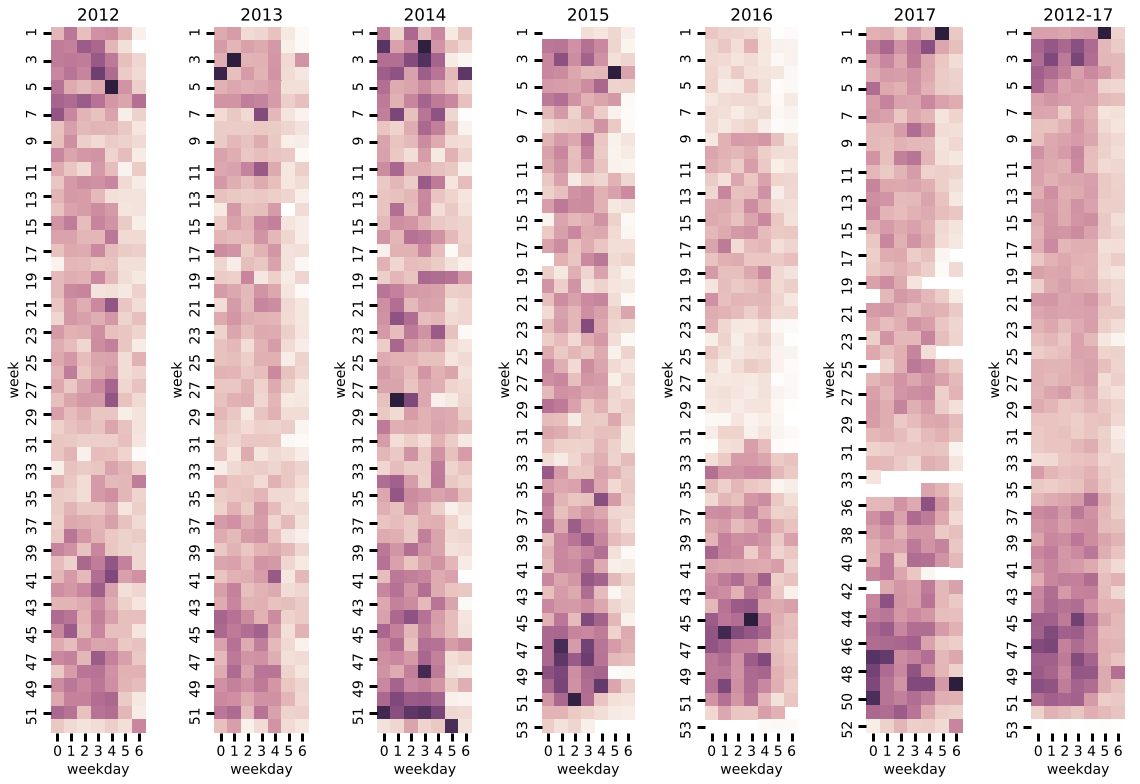

In [177]:
fig, axes = plt.subplots(nrows=1,ncols=7, figsize=(20,13))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)


sns.heatmap(df2012.pivot_table(index='week', columns='weekday',values='accident', aggfunc=sum),square=True, cmap=cmap,
           ax=axes[0], cbar=False)
axes[0].set_title('2012')


sns.heatmap(df2013.pivot_table(index='week', columns='weekday',values='accident', aggfunc=sum),square=True, cmap=cmap,
           ax=axes[1], cbar=False)
axes[1].set_title('2013')

sns.heatmap(df2014.pivot_table(index='week', columns='weekday',values='accident', aggfunc=sum),square=True, cmap=cmap,
           ax=axes[2], cbar=False)
axes[2].set_title('2014')


sns.heatmap(df2015.pivot_table(index='week', columns='weekday',values='accident', aggfunc=sum),square=True, cmap=cmap,
           ax=axes[3], cbar=False)
axes[3].set_title('2015')


sns.heatmap(df2016.pivot_table(index='week', columns='weekday',values='accident', aggfunc=sum),square=True, cmap=cmap,
           ax=axes[4], cbar=False)
axes[4].set_title('2016')


sns.heatmap(df2017.pivot_table(index='week', columns='weekday',values='accident', aggfunc=sum),square=True, cmap=cmap
           , ax=axes[5], cbar=False, vmax=500)
axes[5].set_title('2017')


sns.heatmap(df.pivot_table(index='week', columns='weekday',values='accident', aggfunc=sum),square=True, cmap=cmap
           , ax=axes[6], cbar=False)
axes[6].set_title('2012-17')





In [43]:
df['ym'] = df['year'].map(lambda x: str(x)+"_")

In [44]:
df['ym'] = df['ym'] + df['month'].map(lambda x: '0'+str(x) if x<10 else str(x))

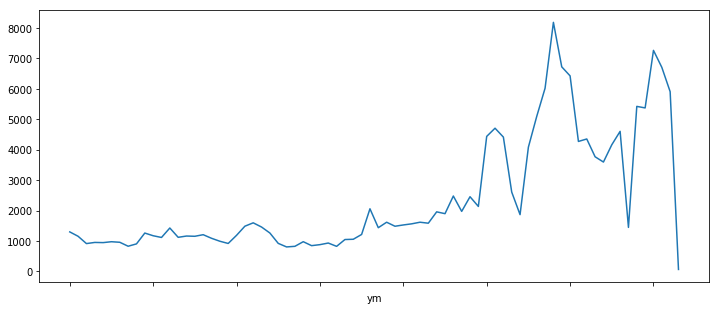

In [58]:
df.groupby('ym')['accident'].sum().sort_index().plot(kind='line', figsize=(12,5), rot=90)
# plt.xlabel(df.groupby('ym')['accident'].sum().sort_index().index.tolist())

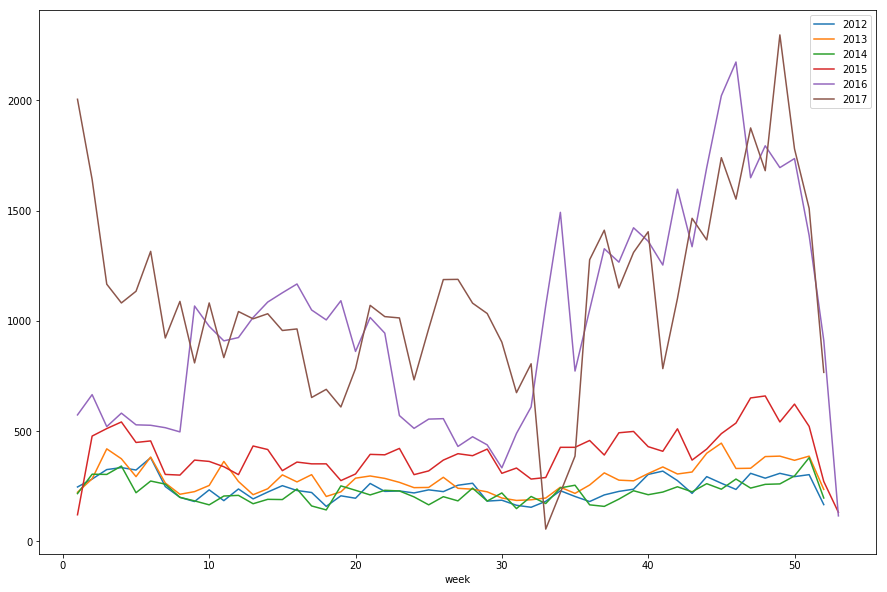

In [30]:
plt.figure(figsize=(15,10))
df2012.groupby('week')['accident'].sum().plot(kind='line', label='2012')
df2013.groupby('week')['accident'].sum().plot(kind='line', label='2013')
df2014.groupby('week')['accident'].sum().plot(kind='line', label='2014')
df2015.groupby('week')['accident'].sum().plot(kind='line', label='2015')
df2016.groupby('week')['accident'].sum().plot(kind='line', label='2016')
df2017.groupby('week')['accident'].sum().plot(kind='line', label='2017')
plt.legend()

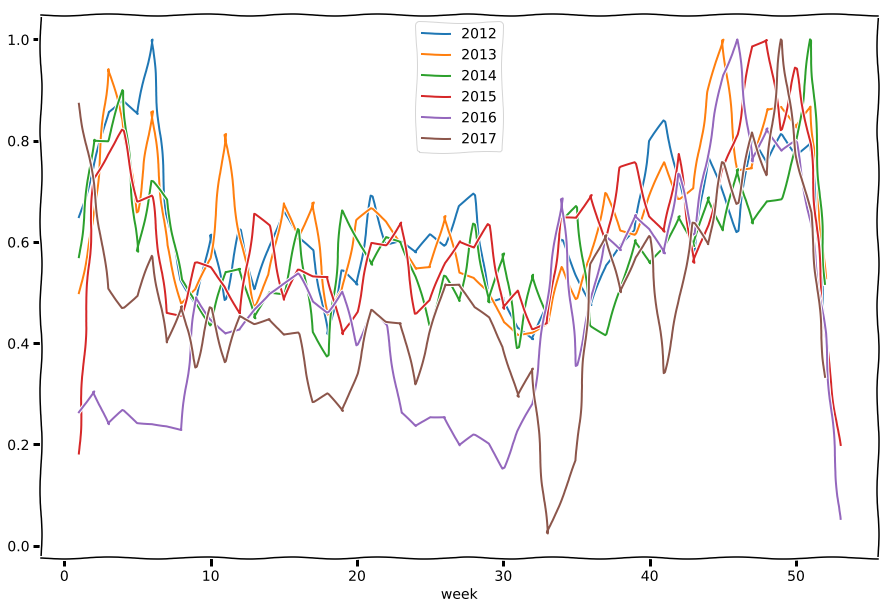

In [175]:
plt.figure(figsize=(15,10))
(df2012.groupby('week')['accident'].sum()/df2012.groupby('week')['accident'].sum().max()).plot(kind='line', label='2012')
(df2013.groupby('week')['accident'].sum()/df2013.groupby('week')['accident'].sum().max()).plot(kind='line', label='2013')
(df2014.groupby('week')['accident'].sum()/df2014.groupby('week')['accident'].sum().max()).plot(kind='line', label='2014')
(df2015.groupby('week')['accident'].sum()/df2015.groupby('week')['accident'].sum().max()).plot(kind='line', label='2015')
(df2016.groupby('week')['accident'].sum()/df2016.groupby('week')['accident'].sum().max()).plot(kind='line', label='2016')
(df2017.groupby('week')['accident'].sum()/df2017.groupby('week')['accident'].sum().max()).plot(kind='line', label='2017')
plt.legend()

---

In [8]:
t_ = t.set_index('datetime')

In [28]:
t_.to_period('H')

,accident
datetime,
2018-02-19 14:00,1
2018-02-19 14:00,1
2018-02-16 06:00,1
2018-02-15 15:00,1
2018-02-15 10:00,1
2018-02-15 09:00,1
2018-02-15 09:00,1
2018-02-15 08:00,1
2018-02-14 12:00,1


In [29]:
t.head()

,accident,datetime
0,1,2018-02-19 14:56:30
1,1,2018-02-19 14:25:46
2,1,2018-02-16 06:31:28
3,1,2018-02-15 15:11:22
4,1,2018-02-15 10:51:55


In [182]:
df.columns

Index(['id', 'source', 'datetime', 'direction', 'x', 'y', 'ending', 'weg',
       'key', 'hecto', 'hectomtrng', 'dvk_letter', 'pos_tv_wol', 'hecto_key',
       'accident', 'hour', 'weekday', 'month', 'year', 'week', 'date'],
      dtype='object')

In [202]:
hec = pd.read_sql('select * from rws_schema.hectopunten;', con=conn)

In [203]:
common_cols = list(set(df.columns).intersection(set(hec.columns)))

In [204]:
df[common_cols].head()

,dvk_letter,pos_tv_wol,id,hectomtrng,weg,key,hecto
0,None,Li,90088.0,608.0,35.0,35.608.Li,60.8
1,None,Li,90087.0,795.0,2.0,2.795.Li,79.5
2,None,Re,90086.0,99.0,12.0,12.99.Re,9.9
3,y,Li,90085.0,236.0,16.0,16.236.y,23.6
4,c,Li,90084.0,97.0,200.0,200.97.c,9.7


In [213]:
%precision 3

'%.3f'

In [219]:

for col in common_cols:
    print(col, hec[col].unique().shape[0])

dvk_letter 27
pos_tv_wol 3
id 284366
hectomtrng 3065
weg 56
key 80028
hecto 3065


In [220]:
hec.shape

(528465, 296)

In [222]:
hec[common_cols]

,dvk_letter,pos_tv_wol,id,hectomtrng,weg,key,hecto
0,f,Li,261365024_20170301_101,$101.00,1,1.101.f,"10,1"
1,m,Re,261365016_20161001_104,$104.00,1,1.104.m,"10,4"
2,d,Li,417344009_20141101_1045,"$1,045.00",1,1.1045.d,"104,5"
3,None,Re,261365018_20161001_105,$105.00,1,1.105.Re,"10,5"
4,f,Li,261365024_20170301_100,$100.00,1,1.100.f,10
5,None,Re,261365018_20161001_103,$103.00,1,1.103.Re,"10,3"
6,None,Re,417343011_20150301_1043,"$1,043.00",1,1.1043.Re,"104,3"
7,c,Li,418344018_20141101_1048,"$1,048.00",1,1.1048.c,"104,8"
8,m,Re,261365016_20161001_100,$100.00,1,1.100.m,10
9,m,Re,261365016_20161001_103,$103.00,1,1.103.m,"10,3"


In [234]:
hec.wvk_begdat.map(lambda x: x.year).value_counts().sort_index()

2010     87541
2011     36689
2012     22024
2013     74750
2014    235233
2015     33261
2016     25559
2017     12099
2018      1309
Name: wvk_begdat, dtype: int64

In [237]:
hec.head(1).transpose()

,0
id,261365024_20170301_101
id_jaar,261365024_20170301_101_2018
key_jaar,1.101.f.2018
key,1.101.f
jaar,"$2,018.00"
wvk_id,"$261,365,024.00"
wvk_begdat,2017-03-01
hectomtrng,$101.00
hecto,"10,1"
pos_tv_wol,Li


In [238]:
hec.shape

(528465, 296)

## Exploring the deadly day of Jan 2017 where 1000 incidents happened

In [250]:
the_day = df2017.loc[df2017['date']==pd.to_datetime('2017-01-07').date()]

In [251]:
the_day.shape

(1164, 21)

In [252]:
the_day.columns

Index(['id', 'source', 'datetime', 'direction', 'x', 'y', 'ending', 'weg',
       'key', 'hecto', 'hectomtrng', 'dvk_letter', 'pos_tv_wol', 'hecto_key',
       'accident', 'hour', 'weekday', 'month', 'year', 'week', 'date'],
      dtype='object')

In [255]:
the_day.groupby('hour')['accident'].sum()

hour
0       2
1       3
3      11
4      33
5      37
6      56
7      74
8     113
9      88
10     97
11     72
12     48
13     61
14     73
15     95
16     53
17     55
18     35
19     45
20     49
21     23
22     33
23      8
Name: accident, dtype: int64

In [256]:
# do they have the same timestamps?

In [259]:
the_day.columns

Index(['id', 'source', 'datetime', 'direction', 'x', 'y', 'ending', 'weg',
       'key', 'hecto', 'hectomtrng', 'dvk_letter', 'pos_tv_wol', 'hecto_key',
       'accident', 'hour', 'weekday', 'month', 'year', 'week', 'date'],
      dtype='object')

In [260]:
the_day[['weg','key','hecto']]

,weg,key,hecto
61371,$20.00,20.355.u,$35.50
61372,$20.00,20.355.r,$35.50
61373,$2.00,2.1870.Li,$187.00
61374,$2.00,2.2126.Li,$212.60
61375,$27.00,27.565.u,$56.50
61376,$2.00,2.2040.Re,$204.00
61377,$48.00,48.1038.b,$103.80
61378,$27.00,27.1097.Re,$109.70
61379,$73.00,73.361.Li,$36.10
61380,$37.00,37.370.Re,$37.00


In [263]:
df2017.groupby('date')['accident'].sum().sum()

57387

In [264]:
df2016.groupby('date')['accident'].sum().sum()

52723

In [265]:
57387/52723

'1.09'

## Connecting weather with accident time-series

In [7]:
knmi = pd.read_sql('select * from rws_schema.knmi_data;', con=conn)
knmi.loc[:,'YYYYMMDD'] = pd.to_datetime(knmi.YYYYMMDD)

In [12]:
ong_closest_station = pd.read_sql('SELECT * FROM rws_schema.ongevallen_knmi_link;', con=conn)

In [13]:
ong_closest_station.head()

,id,STN,NAME,dist
0,1.0,290,TWENTHE,0.095110
1,2.0,370,EINDHOVEN,0.154516
2,3.0,249,BERKHOUT,0.049834
3,4.0,290,TWENTHE,0.095110
4,5.0,370,EINDHOVEN,0.154516


In [8]:
df.shape

(176112, 14)

In [9]:
knmi.shape

(2613768, 25)

In [10]:
util.get_weather

<function scripts.util.get_weather(timestamp, station, weather_type, knmi_data)>

In [14]:
df.head()

,id,source,datetime,direction,x,y,ending,weg,key,hecto,hectomtrng,dvk_letter,pos_tv_wol,hecto_key
0,90088.0,NDW,2018-02-19 14:56:30,None,6.759355,52.241428,None,35.0,35.608.Li,60.8,608.0,None,Li,497347012.2017-11-01.608
1,90087.0,NDW,2018-02-19 14:25:46,None,5.147580,51.941662,None,2.0,2.795.Li,79.5,795.0,None,Li,275279004.2017-09-01.795
2,90086.0,NDW,2018-02-16 06:31:28,None,4.423963,52.051788,None,12.0,12.99.Re,9.9,99.0,None,Re,177303013.2017-12-01.99
3,90085.0,NDW,2018-02-15 15:11:22,None,4.564720,51.884312,None,16.0,16.236.y,23.6,236.0,y,Li,196267066.2014-11-01.236
4,90084.0,NDW,2018-02-15 10:51:55,None,4.700294,52.384201,None,200.0,200.97.c,9.7,97.0,c,Li,216377018.2015-04-01.97


In [20]:
df.rename(columns={'id':'Id'}, inplace=True)
ong_closest_station.rename(columns={'id':'Id'}, inplace=True)

In [129]:
# ong_closest_station

,Id,STN,NAME,dist
0,1.0,290,TWENTHE,0.095110
1,2.0,370,EINDHOVEN,0.154516
2,3.0,249,BERKHOUT,0.049834
3,4.0,290,TWENTHE,0.095110
4,5.0,370,EINDHOVEN,0.154516
5,6.0,370,EINDHOVEN,0.127985
6,7.0,370,EINDHOVEN,0.127985
7,8.0,257,WIJK_AAN_ZEE,0.066655
8,9.0,391,ARCEN,0.167705
9,10.0,377,ELL,0.130919


In [28]:
t = pd.merge(df, ong_closest_station, on='Id', how='left')

In [31]:
t.head()

,Id,source,datetime,direction,x,y,ending,weg,key,hecto,hectomtrng,dvk_letter,pos_tv_wol,hecto_key,STN,NAME,dist
0,90088.0,NDW,2018-02-19 14:56:30,None,6.759355,52.241428,None,35.0,35.608.Li,60.8,608.0,None,Li,497347012.2017-11-01.608,290,TWENTHE,0.135615
1,90087.0,NDW,2018-02-19 14:25:46,None,5.147580,51.941662,None,2.0,2.795.Li,79.5,795.0,None,Li,275279004.2017-09-01.795,356,HERWIJNEN,0.082677
2,90086.0,NDW,2018-02-16 06:31:28,None,4.423963,52.051788,None,12.0,12.99.Re,9.9,99.0,None,Re,177303013.2017-12-01.99,215,VOORSCHOTEN,0.090159
3,90085.0,NDW,2018-02-15 15:11:22,None,4.564720,51.884312,None,16.0,16.236.y,23.6,236.0,y,Li,196267066.2014-11-01.236,344,ROTTERDAM,0.141044
4,90084.0,NDW,2018-02-15 10:51:55,None,4.700294,52.384201,None,200.0,200.97.c,9.7,97.0,c,Li,216377018.2015-04-01.97,240,SCHIPHOL,0.111489


we need to extend the timeseries and add weather - but we don't know what area should I do that to. 


In [60]:
df.weg

0          35.0
1           2.0
2          12.0
3          16.0
4         200.0
5          27.0
6          58.0
7          16.0
8          27.0
9           7.0
10         27.0
11         27.0
12         16.0
13          2.0
14          7.0
15         15.0
16          9.0
17         20.0
18          4.0
19         13.0
20         13.0
21         73.0
22          4.0
23          4.0
24         20.0
25         58.0
26         17.0
27         50.0
28         28.0
29          1.0
          ...  
176082     50.0
176083     58.0
176084      6.0
176085      6.0
176086     15.0
176087      7.0
176088      4.0
176089     44.0
176090     50.0
176091      4.0
176092     13.0
176093      9.0
176094     12.0
176095      1.0
176096     20.0
176097      4.0
176098      1.0
176099     58.0
176100      2.0
176101      4.0
176102      4.0
176103      4.0
176104     16.0
176105     13.0
176106     20.0
176107     10.0
176108     16.0
176109     16.0
176110      4.0
176111     10.0
Name: weg, Length: 17611

In [42]:
df.groupby('weg')['accident'].sum().sort_values(ascending=False)

weg
2.0      18867
12.0     13210
4.0      12755
1.0      12008
28.0     10454
58.0     10088
15.0      9251
27.0      8709
50.0      8656
16.0      8127
7.0       7790
10.0      6942
20.0      6066
9.0       5822
59.0      4268
73.0      3977
6.0       3819
67.0      3445
13.0      1910
76.0      1637
35.0      1633
44.0      1567
32.0      1554
8.0       1178
29.0      1159
65.0       992
17.0       960
31.0       929
5.0        866
57.0       715
11.0       690
33.0       669
30.0       662
37.0       646
3.0        558
22.0       507
200.0      454
835.0      440
14.0       414
79.0       370
36.0       283
99.0       162
61.0       153
77.0       140
48.0       126
38.0       121
915.0       74
205.0       69
46.0        62
783.0       46
325.0       33
838.0       28
708.0       27
74.0        24
Name: accident, dtype: int64

Let's work with A15

In [85]:
a12 = df.loc[df.weg==12]

In [86]:
a12

,id,source,datetime,direction,x,y,ending,weg,key,hecto,...,dvk_letter,pos_tv_wol,hecto_key,accident,hour,weekday,month,year,week,date
2,90086.0,NDW,2018-02-16 06:31:28,None,4.423963,52.051788,None,12.0,12.99.Re,9.9,...,None,Re,177303013.2017-12-01.99,1,6,4,2,2018,7,2018-02-16
53,90035.0,NDW,2018-02-01 11:13:25,None,4.572297,52.028400,None,12.0,12.205.Re,20.5,...,None,Re,196299008.2014-11-01.205,1,11,3,2,2018,5,2018-02-01
58,90030.0,NDW,2018-02-01 08:57:43,None,5.699402,52.013931,None,12.0,12.1124.Re,112.4,...,None,Re,346294027.2014-11-01.1124,1,8,3,2,2018,5,2018-02-01
60,90028.0,NDW,2018-02-01 07:39:28,None,4.660084,52.023991,None,12.0,12.268.h,26.8,...,h,Li,209296014.2014-11-01.268,1,7,3,2,2018,5,2018-02-01
69,90019.0,NDW,2018-01-31 23:07:37,R,5.699400,52.013900,None,12.0,12.1124.Re,112.4,...,None,Re,346294027.2014-11-01.1124,1,23,2,1,2018,5,2018-01-31
70,90018.0,NDW,2018-01-31 23:02:37,R,4.572300,52.028400,None,12.0,12.205.Re,20.5,...,None,Re,196299008.2014-11-01.205,1,23,2,1,2018,5,2018-01-31
81,90007.0,NDW,2018-01-31 21:51:53,R,5.699400,52.013900,None,12.0,12.1124.Re,112.4,...,None,Re,346294027.2014-11-01.1124,1,21,2,1,2018,5,2018-01-31
82,90006.0,NDW,2018-01-31 21:46:42,R,4.572300,52.028400,None,12.0,12.205.Re,20.5,...,None,Re,196299008.2014-11-01.205,1,21,2,1,2018,5,2018-01-31
95,89993.0,NDW,2018-01-31 20:05:42,None,5.615333,52.023769,None,12.0,12.1064.j,106.4,...,j,Re,341296004.2014-11-01.1064,1,20,2,1,2018,5,2018-01-31
97,89991.0,NDW,2018-01-31 20:03:25,None,5.473556,52.049850,None,12.0,12.860.Re,86.0,...,None,Re,321302016.2014-11-01.860,1,20,2,1,2018,5,2018-01-31


In [47]:
df.columns

Index(['id', 'source', 'datetime', 'direction', 'x', 'y', 'ending', 'weg',
       'key', 'hecto', 'hectomtrng', 'dvk_letter', 'pos_tv_wol', 'hecto_key',
       'accident', 'hour', 'weekday', 'month', 'year', 'week', 'date'],
      dtype='object')

Let's quickly plot it to see if it's the same road or not

In [88]:
import folium
import datetime as dt
import random as rnd
from folium.plugins import HeatMap

PT_COORD = [52.0297195, 4.5003863]

coords = list(zip(a12.y, a12.x))


map_pt = folium.Map(location=PT_COORD, zoom_start=7.75,width=1000, height=600, tiles='Stamen Terrain')

# Plot coordinates using comprehension list
# [folium.CircleMarker(sample_coords[i], radius=2,
#                 color='#0080bb', fill_color='#0080bb').add_to(map_pt)] 

HeatMap(coords).add_to(map_pt)



In [90]:
map_pt

In [115]:
a12h28 = a12.loc[a12.hecto==28.0]

In [116]:
a12h28.shape

(100, 21)

In [117]:
PT_COORD = [52.0297195, 4.5003863]

coords = list(zip(a12h28.y, a12h28.x))

map_pt = folium.Map(location=PT_COORD, zoom_start=7.75,width=1000, height=600, tiles='Stamen Terrain')

# Plot coordinates using comprehension list
# [folium.CircleMarker(sample_coords[i], radius=2,
#                 color='#0080bb', fill_color='#0080bb').add_to(map_pt)] 

HeatMap(coords).add_to(map_pt)



In [118]:
map_pt

In [120]:
a12h28.year.value_counts()

2016    43
2017    27
2015    20
2013     5
2012     3
2018     2
Name: year, dtype: int64

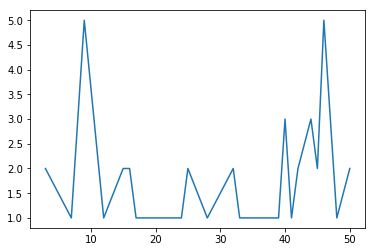

In [122]:
a12h28.loc[a12h28.year==2016, 'week'].value_counts().sort_index().plot(kind='line')

In [160]:
range_ = pd.date_range('2016-01-01', '2016-12-31', freq='60min')
tseries_full = pd.DataFrame(index = range_)

In [ ]:
t = pd.merge(df, ong_closest_station, on='Id', how='left')

In [125]:
df.columns

Index(['id', 'source', 'datetime', 'direction', 'x', 'y', 'ending', 'weg',
       'key', 'hecto', 'hectomtrng', 'dvk_letter', 'pos_tv_wol', 'hecto_key',
       'accident', 'hour', 'weekday', 'month', 'year', 'week', 'date'],
      dtype='object')

In [126]:
tseries = a12h28[['datetime', 'accident', 'hour', 'weekday', 'month', 'year', 'date','id']]

In [132]:
ong_closest_station.rename(columns={'Id': 'id'}, inplace=True)

In [134]:
tseries = pd.merge(tseries, ong_closest_station, on='id', how='left')

In [137]:
tseries.set_index('datetime', inplace=True)

In [138]:
tseries.head()

,accident,hour,weekday,month,year,date,id,STN,NAME,dist
datetime,,,,,,,,,,
2018-01-08 18:29:30,1,18,0,1,2018,2018-01-08,85153.0,344,ROTTERDAM,0.237909
2018-01-08 17:23:53,1,17,0,1,2018,2018-01-08,85125.0,344,ROTTERDAM,0.237909
2017-12-13 09:38:47,1,9,2,12,2017,2017-12-13,80942.0,344,ROTTERDAM,0.237909
2017-12-13 08:23:43,1,8,2,12,2017,2017-12-13,80910.0,344,ROTTERDAM,0.237909
2017-12-04 12:03:59,1,12,0,12,2017,2017-12-04,78079.0,344,ROTTERDAM,0.237874


In [144]:
tseries = tseries.loc[tseries.year==2016]

In [157]:
tseries_hour = tseries[['accident']].resample('H').sum()

In [158]:
tseries_hour.head()

,accident
datetime,
2016-01-19 09:00:00,1
2016-01-19 10:00:00,0
2016-01-19 11:00:00,0
2016-01-19 12:00:00,0
2016-01-19 13:00:00,0


In [163]:
tseries_full.reset_index(inplace=True)


In [165]:
tseries_full.rename(columns={'index':'datetime'}, inplace=True)

In [169]:
tseries_full = pd.merge(tseries_full, tseries_hour, on='datetime', how='left').fillna(0)

In [174]:
tseries_full.head()

,datetime,accident
0,2016-01-01 00:00:00,0.0
1,2016-01-01 01:00:00,0.0
2,2016-01-01 02:00:00,0.0
3,2016-01-01 03:00:00,0.0
4,2016-01-01 04:00:00,0.0


In [175]:
from scripts import util

In [177]:
util.init_knmi_gis

array([344])